In [100]:
from PIL import Image
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
from qiskit import * 


# style.use('default')
style.use('bmh')

image_size = 64
image_crop_size = 32

image_raw = np.array(Image.open('./image.png'))
print('Raw Image info: ', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

print(image_raw[255])
# Convert the RGB Image to B&W
# image = []
# for i in range(image_size):
#     image.append([])
#     for j in range(image_size):
#         image[i].append(image_raw[i][j][0] // 255)
# image = np.array(image)
# print('Image shape (numpy array):', image.shape)
# print(image)


# # Display the image
# plt.title('Big Image')
# plt.xticks(range(0, image.shape[0]+1, 32))
# plt.yticks(range(0, image.shape[1]+1, 32))
# plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
# plt.show() 

Raw Image info:  (256, 256, 4)
Raw Image datatype: uint8
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


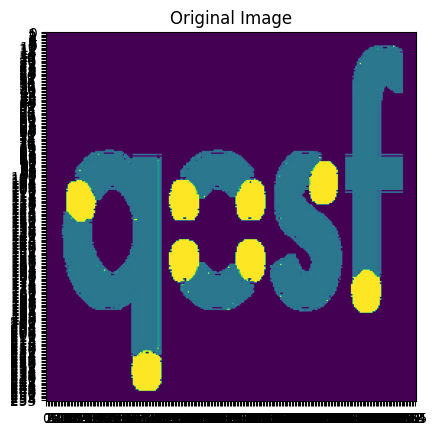

In [4]:
# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
plot_image(image, 'Original Image')

In [5]:
'''
# now let's have a 13 by 13 matrix and find out it's endge
fake = np.array([[1,2,3,4],[5,6,7,8],[9,10,1,1]])
print(fake)
fake[:2, :3] '''

"\n# now let's have a 13 by 13 matrix and find out it's endge\nfake = np.array([[1,2,3,4],[5,6,7,8],[9,10,1,1]])\nprint(fake)\nfake[:2, :3] "

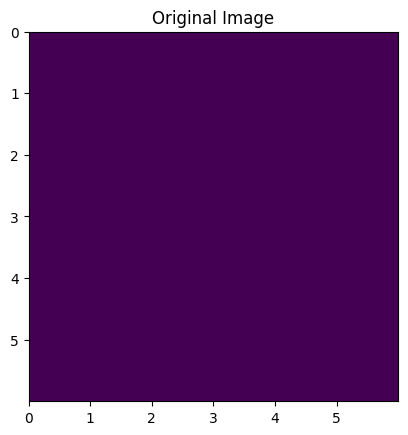

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [80]:
image = image[:8, :8]
# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
plot_image(image, 'Original Image')
print(image)

In [81]:
from scipy.special import logsumexp

# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
            
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)

/tmp/ipykernel_59/462864708.py:13: RuntimeWarning: invalid value encountered in double_scalars
  image_norm.append(ele / rms)
